## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['Date', 'Tag', 'Posts'], header=0)
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.tail()

,Date,Tag,Posts
2281,2022-04-01 00:00:00,php,4110
2282,2022-04-01 00:00:00,python,24505
2283,2022-04-01 00:00:00,r,4868
2284,2022-04-01 00:00:00,ruby,499
2285,2022-04-01 00:00:00,swift,1867


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2286, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

Date     2286
Tag      2286
Posts    2286
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

### Group by

In [6]:
df.groupby('Tag').sum()

,Posts
Tag,
assembly,40143
c,378134
c#,1533404
c++,761737
delphi,49486
go,60982
java,1839168
javascript,2363172
perl,66638


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby('Tag').count()

,Date,Posts
Tag,,
assembly,165,165
c,165,165
c#,166,166
c++,165,165
delphi,165,165
go,150,150
java,165,165
javascript,165,165
perl,165,165


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df['Date'][0]

'2008-07-01 00:00:00'

In [9]:
type(df['Date'][0])

str

### To datetime

In [10]:
# convert date str to date datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'][0]

Timestamp('2008-07-01 00:00:00')

In [12]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


## Data Manipulation



### Pivot

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
pivoted_df = df.pivot(index='Date', columns='Tag', values='Posts')
pivoted_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,725.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN


In [15]:
pivoted_df.shape

(166, 14)

In [16]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

### Count

In [17]:
pivoted_df.count()

Tag
assembly      165
c             165
c#            166
c++           165
delphi        165
go            150
java          165
javascript    165
perl          165
php           165
python        165
r             163
ruby          165
swift         157
dtype: int64

### Fillna - deal with missing values

In [18]:
pivoted_df.fillna(0, inplace=True)
pivoted_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1153.0,725.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


In [20]:
# check if any nan values left in the df
pivoted_df.isna().values.any()

False

In [19]:
pivoted_df.count()

Tag
assembly      166
c             166
c#            166
c++           166
delphi        166
go            166
java          166
javascript    166
perl          166
php           166
python        166
r             166
ruby          166
swift         166
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., python) on a chart.

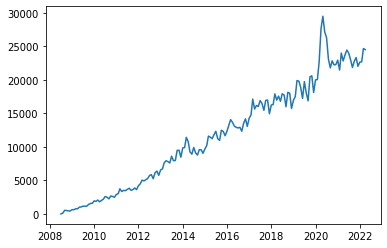

In [23]:
plt.plot(pivoted_df.index, pivoted_df['python'])

### Styling the chart

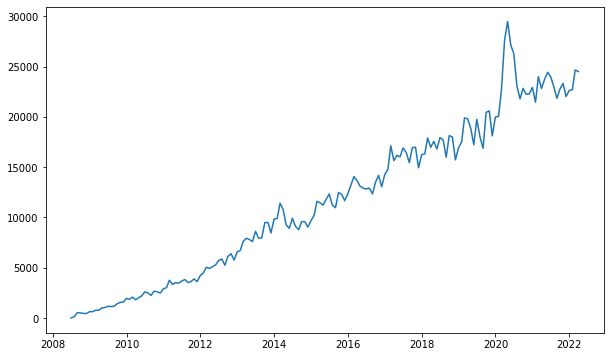

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(pivoted_df.index, pivoted_df['python'])

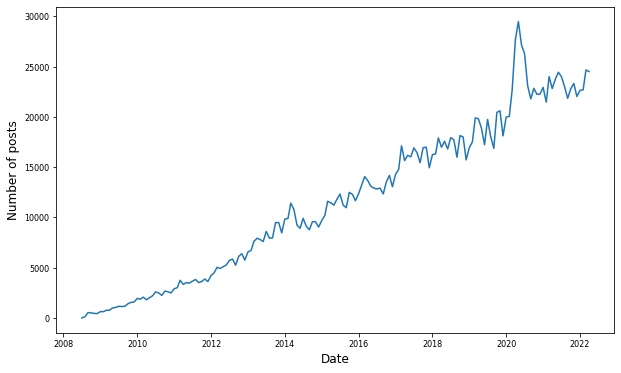

In [30]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.plot(pivoted_df.index, pivoted_df['python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

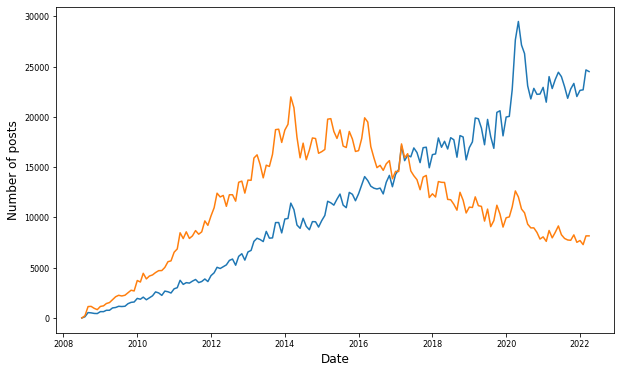

In [31]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.plot(pivoted_df.index, pivoted_df['python'])
plt.plot(pivoted_df.index, pivoted_df['java'])

### For loop plot

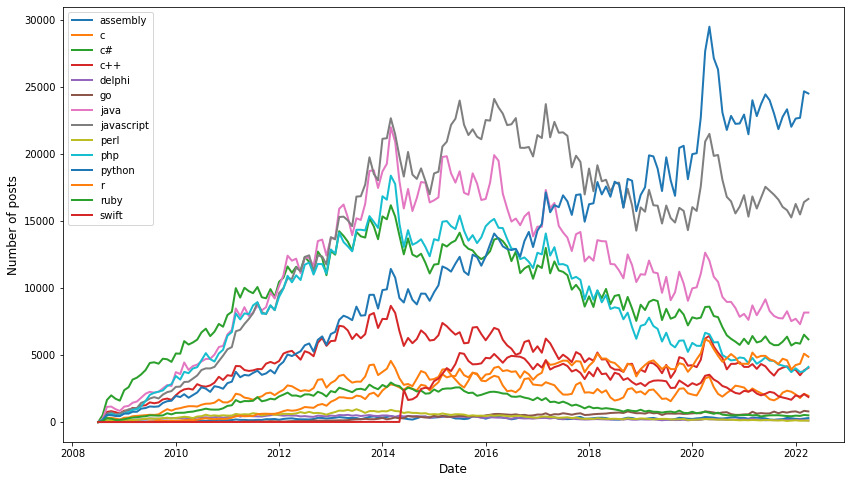

In [36]:
# plot all languages on the same chart, with styling
plt.figure(figsize=(14,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=2, label=pivoted_df[column].name)

plt.legend(fontsize=10)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

### Rolling mean

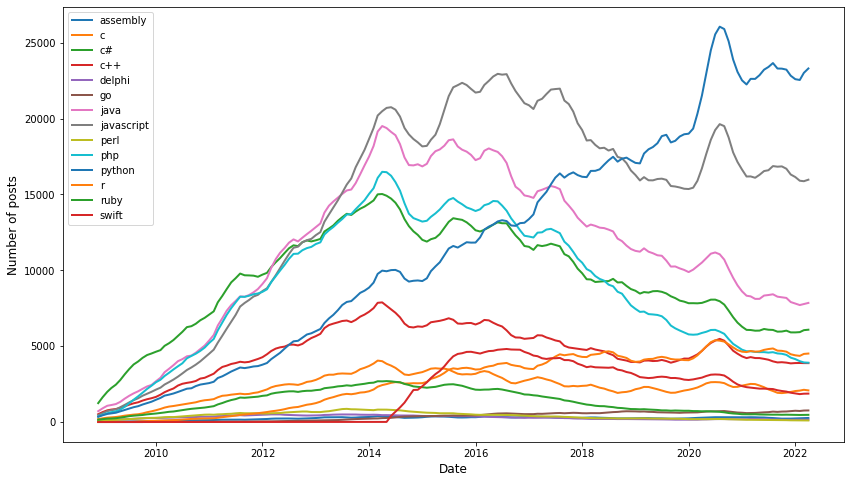

In [41]:
rolling_df = pivoted_df.rolling(6).mean()   # calculate the avg of every 6 entries

plt.figure(figsize=(14,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], linewidth=2, label=rolling_df[column].name)

plt.legend(fontsize=10)

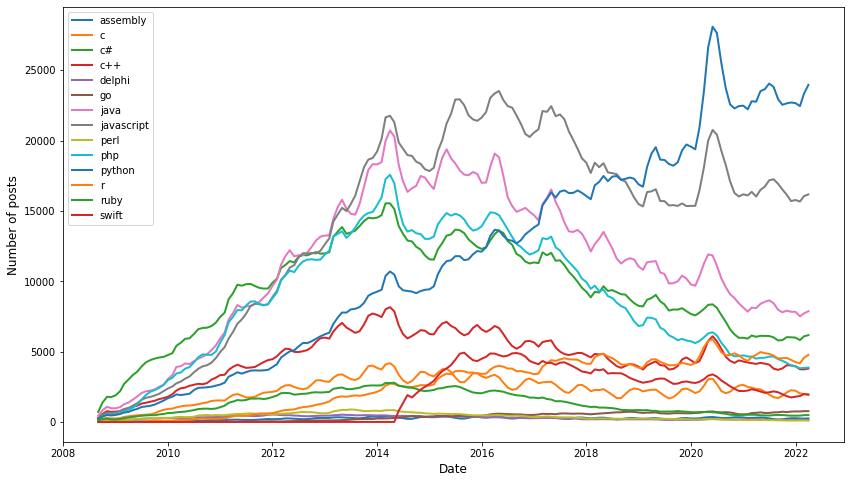

In [42]:
rolling_df = pivoted_df.rolling(3).mean()   # calculate the avg of every 3 entries

plt.figure(figsize=(14,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], linewidth=2, label=rolling_df[column].name)

plt.legend(fontsize=10)

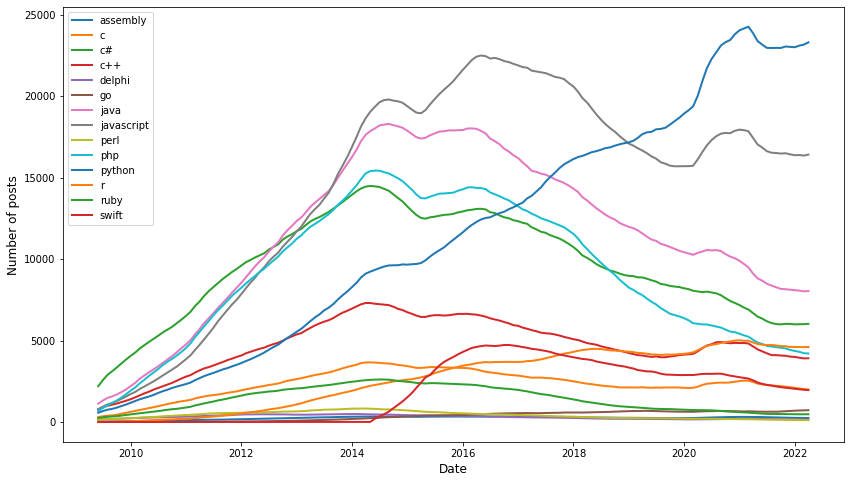

In [43]:
rolling_df = pivoted_df.rolling(12).mean()  # calculate the avg of every 12 entries

plt.figure(figsize=(14,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], linewidth=2, label=rolling_df[column].name)

plt.legend(fontsize=10)